<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [45]:
movies = pd.read_csv('./data/imdb_1000.csv')
#check for type
type(movies)

pandas.core.frame.DataFrame

#### Check the number of rows and columns.

In [3]:
#shape gives us rows,columns
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
#info gives us the type of each variable
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [4]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [5]:
#sorting in descending order in order to find the longest movie
movies.sort_values(by='duration', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
...,...,...,...,...,...,...
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."


In [6]:
#sorting in ascending order in order to find the shortest movie
movies.sort_values(by='duration', ascending=True)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [13]:
#find the range of the variable duration
movies['duration'].max()-movies['duration'].min()

178

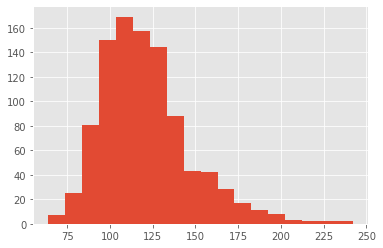

In [15]:
#divide range by 10 so that we have some volume per "bar" and use bins = 18
import matplotlib.pyplot as plt
duration = movies['duration'] 
plt.style.use('ggplot')
plt.hist(duration, bins=18)
plt.show()

#### Use a box plot to display that same data.

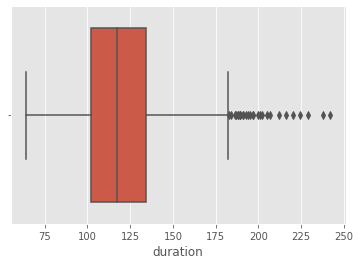

In [16]:
#Use the Seaborn library to create a box plot 
import seaborn as sns
ax = sns.boxplot(x=movies["duration"])

## Intermediate level

#### Count how many movies have each of the content ratings.

In [17]:
#frequency by content rating
rating = movies['content_rating'].value_counts()
rating

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

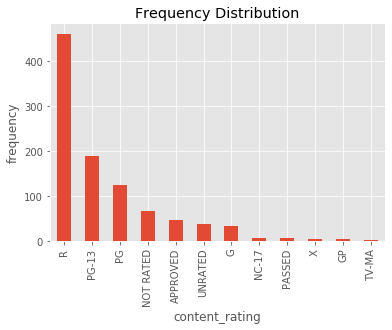

In [21]:
#choosing a bar chart to visualise the frequency per content rating
rating.plot(kind='bar')
plt.title('Frequency Distribution')
plt.xlabel('content_rating')
plt.ylabel('frequency');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [29]:
#Not sure this works
movies['content_rating'] = movies['content_rating'].map({'NOT RATED': 'UNRATED', 'APPROVED': 'UNRATED' , 'GP' : 'UNRATED'})
movies['content_rating'].value_counts()

Series([], Name: content_rating, dtype: int64)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [30]:
#not sure if this works
movies['content_rating'] = movies['content_rating'].map({'X': 'NC-17', 'TV-MA': 'NC-17'})

#### Count the number of missing values in each column.

In [31]:
#take the sum of nan values in each column
movies.isnull().sum()

star_rating         0
title               0
content_rating    979
genre               0
duration            0
actors_list         0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [33]:
#replacing missing values with the highest frequency value. then check for missing values
movies['content_rating'].fillna('R',inplace=True)
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [36]:
#create two dataframes based on duration
long_movies = movies[movies.duration >= 120]
short_movies = movies[movies.duration < 120]
#print the mean for each category as well as the difference between the two
print('Avg rating for movies >= 2 hrs:' , long_movies['star_rating'].mean())
print('Avg rating for movies < 2 hrs:' , short_movies['star_rating'].mean())
print('Diff:' , long_movies['star_rating'].mean() - short_movies['star_rating'].mean())

Avg rating for movies >= 2 hrs: 7.948898678414082
Avg rating for movies < 2 hrs: 7.838666666666657
Diff: 0.11023201174742514


#### Use a visualization to detect whether there is a relationship between duration and star rating.

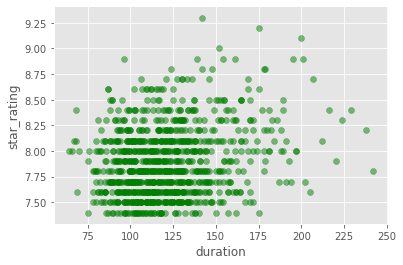

In [37]:
#create a bivariate plot for duration and star rating

import matplotlib.pyplot as plt
import numpy as np

x = movies['duration']
y = movies['star_rating']

plt.scatter(x, y, c="g", alpha=0.5)
plt.xlabel("duration")
plt.ylabel("star_rating")
plt.show()

#### Calculate the average duration for each genre.

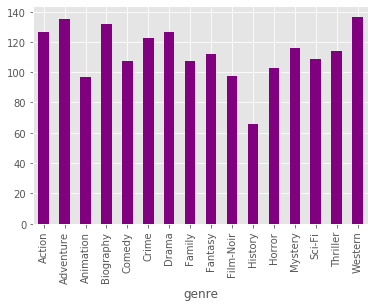

In [43]:
#group by genre and take the mean
duration_by_genre   =   movies.groupby(['genre'])['duration'].mean()
#present it as a bar chart
duration_by_genre.plot(kind='bar' , color='purple')

## Advanced level

#### Visualize the relationship between content rating and duration.

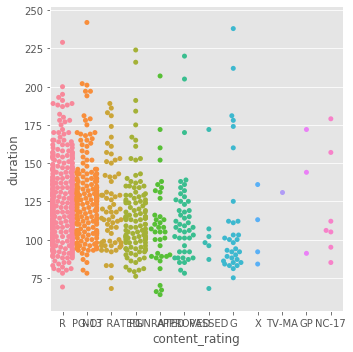

In [46]:
#Need to enlarge but still good visualisation

sns.catplot(x='content_rating', y='duration', kind='swarm', data=movies)

#### Determine the top rated movie (by star rating) for each genre.

In [47]:
#group by and the take the maximum number
movies.groupby(['genre'])['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [65]:
#True if there are duplicates
movies['title'].duplicated().any()


True

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [48]:
#count and mean for all genres
agg = movies.groupby(['genre'])['star_rating'].agg(['count' ,'mean' ])
#including only count>=10
agg.where(agg['count'] >= 10)

,count,mean
genre,,
Action,136.0,7.884559
Adventure,75.0,7.933333
Animation,62.0,7.914516
Biography,77.0,7.862338
Comedy,156.0,7.822436
Crime,124.0,7.916935
Drama,278.0,7.902518
Family,NaN,NaN
Fantasy,NaN,NaN


## Bonus

#### Figure out something "interesting" using the actors data!